<a href="https://colab.research.google.com/github/pratyushchry/Data-Analytics-Notebooks/blob/master/Linear%20Regression%20in%20E-Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Description
This Colab notebook illustrates the typical workflow of a Data Scientist and all the necessary steps followed. 

We will be using the basic Python Libraries for Data Manipulation, basic Visualization libraries for Data Visualization and simple Machine Learning libraries for performing a Linear Regression Analysis. 

This isn't a State-of-the-Art (SoTA) implementation but rather is an intuitive guide to illustrate the basics of the Data Science workflow. 

# Project Description

For the scope of this notebook, imagine that you are a freelance data science and you got hired as a contract worker for a NYC-based online E-Commerce company specialized in clothing. The E-commerce company sells clothing online and also has an in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Let's try and analyze the customer data (it's fake and doesn't contain any real credit card numbers or emails).

# Importing packages

We will begin by importing the required pachages. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following is a code snippet which allows you to upload a file into the Colab file. 

The data which we will be using in the notebook is in a **CSV** file. The file is in the same folder named ["E-Commerce.csv"](https://github.com/pratyushchry/Data-Analytics-Notebooks/blob/master/Data%20Scientist%20for%20an%20E-Commerce%20Startup/Ecommerce%20Customers.csv)

In [0]:
from google.colab import files
import os
uploaded = files.upload()
all_files = [(name, os.path.getmtime(name)) for name in os.listdir()]
latest_file = sorted(all_files, key=lambda x: -x[1])[0][0]

Saving Ecommerce Customers to Ecommerce Customers (2)


In [0]:
customers = pd.read_csv('Ecommerce Customers')

In [0]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Now that we have uploaded the data and we have seen the 'head' of the data, we will play with it a bit more. 

We will be using the "describe()" and "info()" functions. 

In [0]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [0]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


# Exploratory Data Analysis 

Now that we have played around with the data, let's explore it. 

We will be using "Seaborn" to create a jointplot and compare the following columns - "Time spent on the Website" and "the Yearly Amount Spent" 

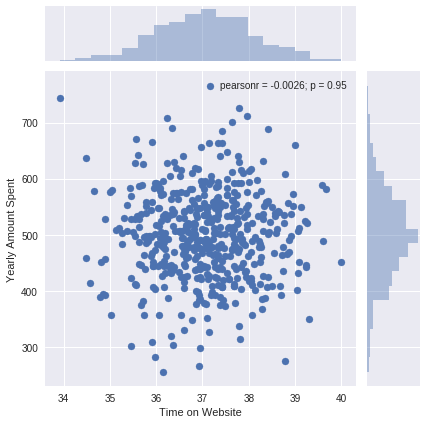

In [0]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')

**Does the correlation make sense?**

Let's repeat the process with "Time on the App" column. 

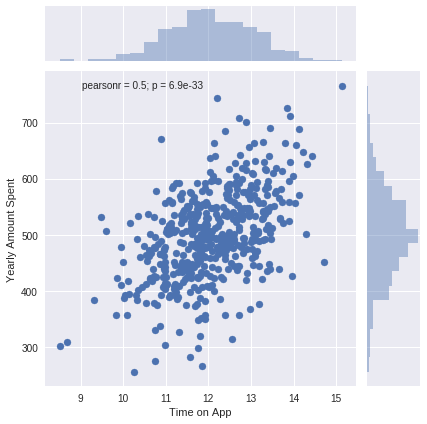

In [0]:
sns.jointplot(data = customers, x='Time on App', y = 'Yearly Amount Spent')

Now let us create a jointplot to compare "Time on the App" and "Length of Membership". 

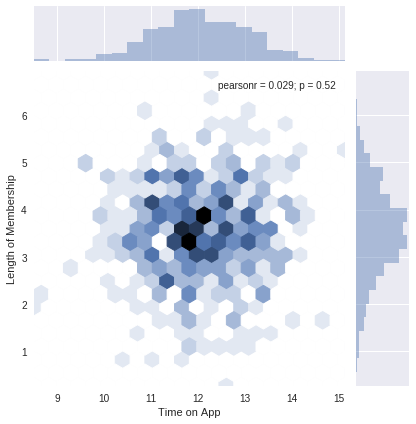

In [0]:
sns.jointplot(x='Time on App',y='Length of Membership', kind='hex',data = customers)

We can choose to create a **Pairplot** to perform multiple comparisions at once instead of doing them one by one. 

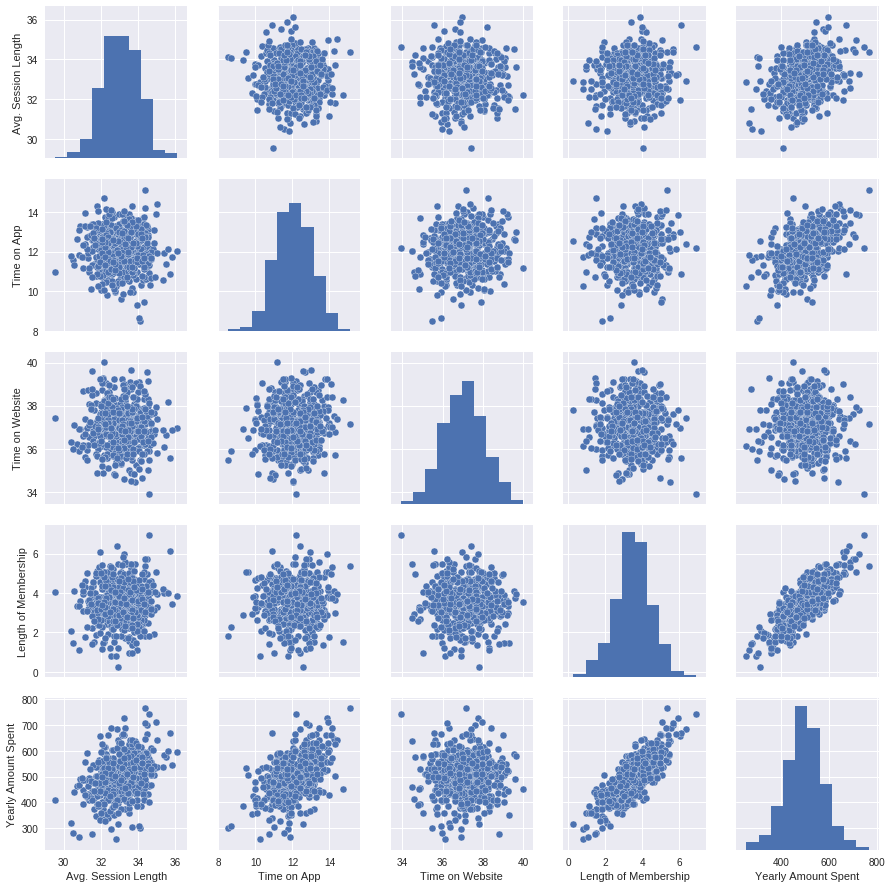

In [0]:
sns.pairplot(customers)

Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

Ans - The Length of Membership

Now let us also create a linear model of Yearly Amount Spent vs Length of Membership. 

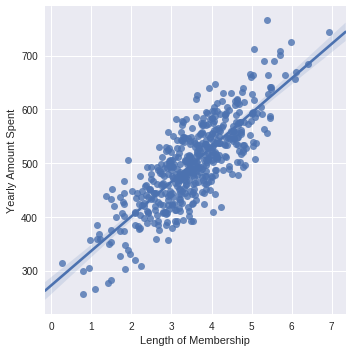

In [0]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data = customers)

# Machine Learning (elementary part)

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

We will be training our model using a simple Linear Regression from Scikit Learn. 

In [0]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [0]:
y = customers['Yearly Amount Spent']

In [0]:
X = customers [['Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

In [0]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=101)

In [0]:
lm = LinearRegression()

In [0]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
X_train

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
269,13.402332,37.292045,3.606087,585.931844
181,13.177775,38.856042,3.230974,557.529274
444,12.132509,35.456798,3.072076,423.470533
287,12.914847,39.068864,1.482360,432.472061
60,12.495592,38.052610,4.639320,616.851523
231,12.144749,37.258031,3.397363,512.552534
218,12.354607,37.122345,2.307552,420.916160
325,13.039511,36.312727,2.018195,447.187644
134,11.851891,37.424548,1.767731,407.804031
341,11.917116,37.766687,4.350888,592.688453


In [0]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Values')

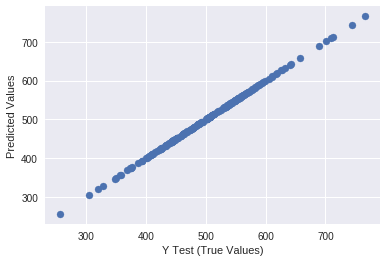

In [0]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

# Model Evaluation

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [0]:
from sklearn import metrics
import pandas as np
print('MAE', metrics.mean_absolute_error(y_test,predictions))
print('MSE', metrics.mean_squared_error(y_test,predictions))

MAE 2.2737367544323206e-15
MSE 1.6155871338926323e-28


In [0]:
metrics.explained_variance_score(y_test,predictions)

1.0

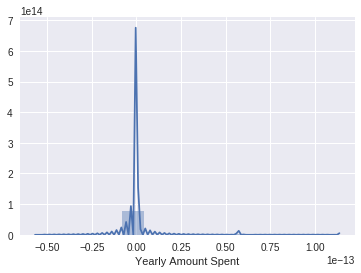

In [0]:
sns.distplot((y_test-predictions))

# Conclusion: Did we answer the question? 

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [0]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Time on App,9.827753e-15
Time on Website,7.105427e-15
Length of Membership,4.055567e-15
Yearly Amount Spent,1.000000e+00


# Interpreting these coefficients

1) Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.</br>
2) Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.</br>
3) Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.<br>
4) Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

**Now should the company focus more on their mobile app or on their website?**

This is tricky as there are two ways of thinking this - You can either develop the website to catch up with the performance of the mobile app. 

Or you can develop the mobile app more since it is working better. 

Answer to this question isn't binary. It depends on a lot of factors - avaiability of resources for instance. 

Maybe there is a big festive sale coming up and you would want to increase your sales. </br>


Or maybe you are looking to raise an additional round of funding and the investors are keen on the number of downloads of the app. </br>


Deciding b/w these trade-offs isn't an easy task and is typically done by a **Product Manager/Business Analyst**. 

# Notes

The purpose of this notebook was to illustrate how the workflow for a typical Data Science project looks like explaining how the Data Science function works in tandem with other functions like Product Management. 

The data sets in the real world won't be as polished, would be way larger and would probably require a lot of cleaning even before they are ready for processing. 

However, the entire process will be very similar to this with the exception of the tools being used. 